In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv("D:\#College\CLG INTER\Car Purchase Prediction\Dataset\car_data.csv")
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [34]:
df.isnull().any()

User ID         False
Gender          False
Age             False
AnnualSalary    False
Purchased       False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [36]:
df.shape

(1000, 5)

In [37]:
df.Purchased.value_counts()

Purchased
0    598
1    402
Name: count, dtype: int64

In [38]:
X =df.iloc[:,:-1]
X.head()

,User ID,Gender,Age,AnnualSalary
0,385,Male,35,20000
1,681,Male,40,43500
2,353,Male,49,74000
3,895,Male,40,107500
4,661,Male,25,79000


In [39]:
y =df.Purchased
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

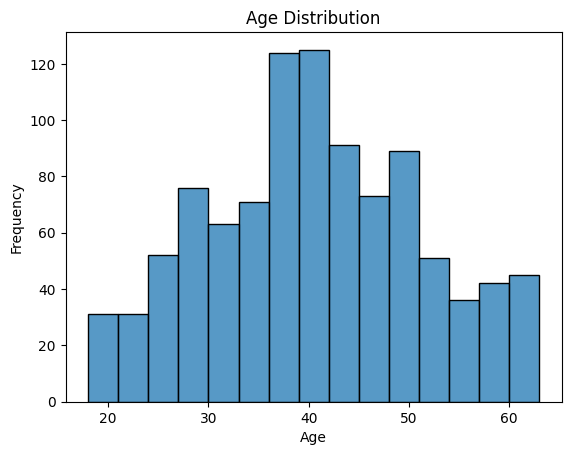

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for the "Age" variable
sns.histplot(data=df, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

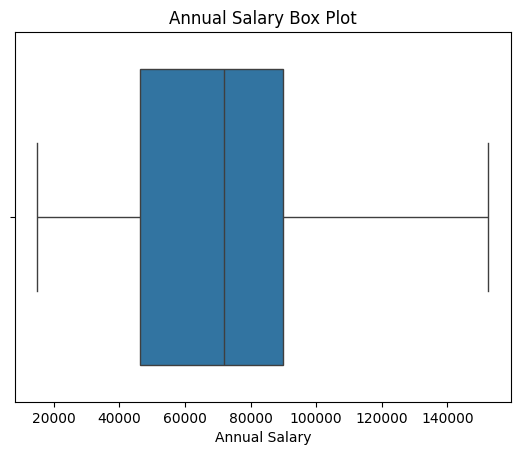

In [41]:
sns.boxplot(data=df, x='AnnualSalary')
plt.title('Annual Salary Box Plot')
plt.xlabel('Annual Salary')
plt.show()

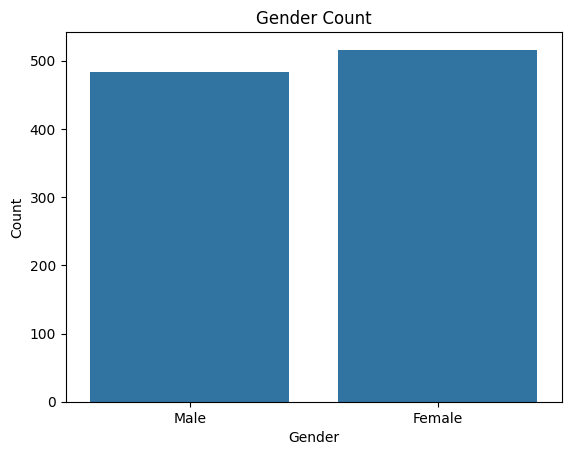

In [42]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Purchased'>

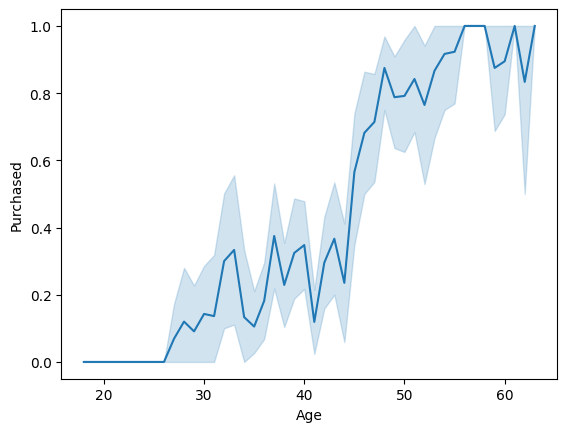

In [43]:
sns.lineplot(x = df.Age,y=df.Purchased)

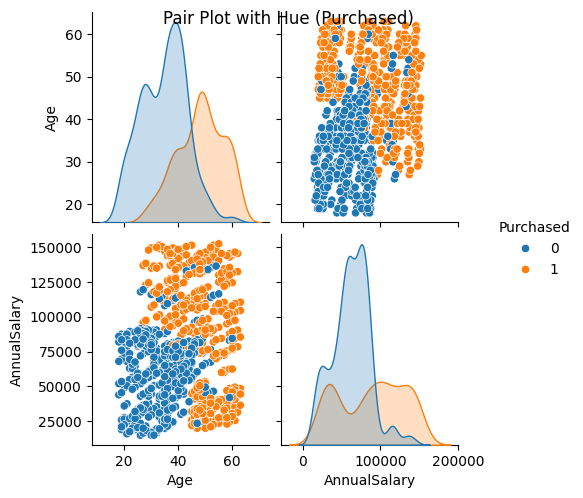

In [44]:
cols = df[['Age', 'AnnualSalary', 'Purchased']]
sns.pairplot(data=cols, hue='Purchased')
plt.suptitle('Pair Plot with Hue (Purchased)')
plt.show()

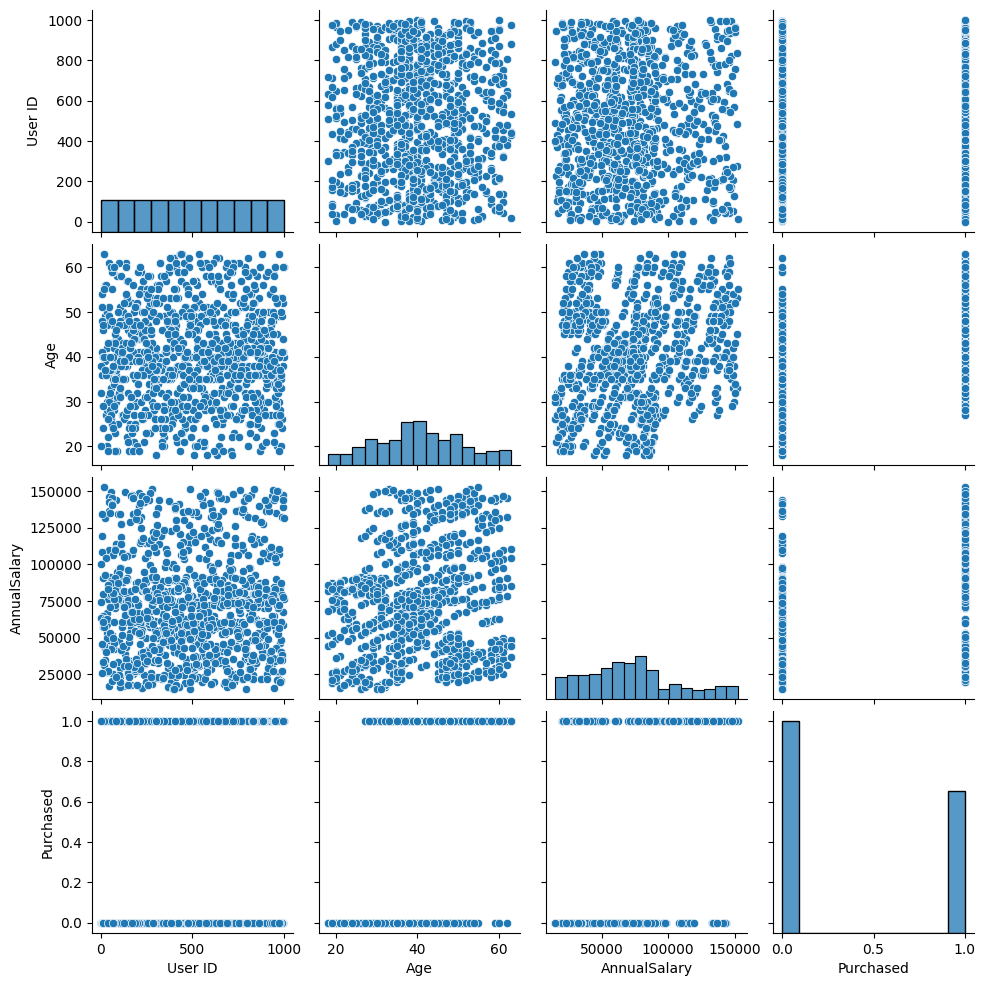

In [45]:
sns.pairplot(df)

C:\Users\Vikram\AppData\Local\Temp\ipykernel_13912\3780850275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df[df['Age_Less_Than_Avg']], palette='husl')
C:\Users\Vikram\AppData\Local\Temp\ipykernel_13912\3780850275.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df[df['Salary_Greater_Than_Avg']], palette='husl')


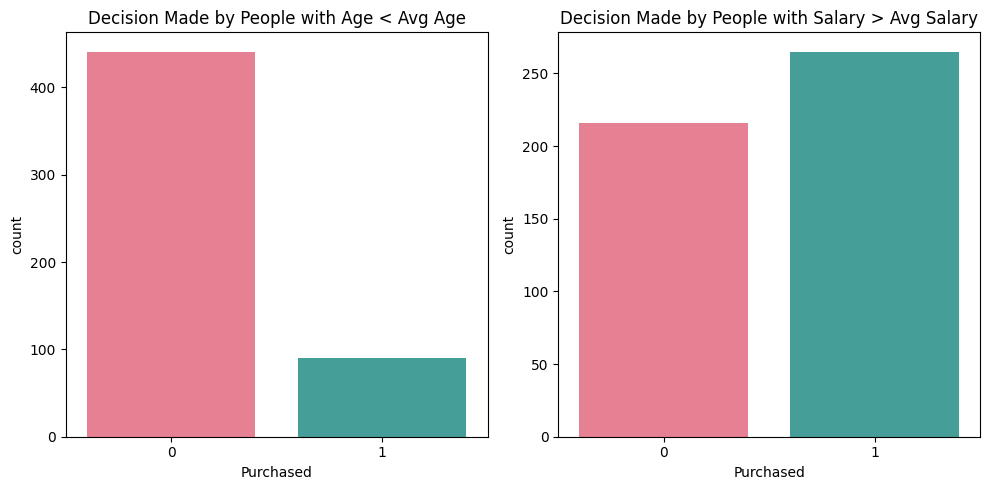

In [46]:
average_age = df['Age'].mean()
average_salary = df['AnnualSalary'].mean()
df['Age_Less_Than_Avg'] = df['Age'] < average_age
df['Salary_Greater_Than_Avg'] = df['AnnualSalary'] > average_salary

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Purchased', data=df[df['Age_Less_Than_Avg']], palette='husl')
plt.title('Decision Made by People with Age < Avg Age')
plt.subplot(1, 2, 2)
sns.countplot(x='Purchased', data=df[df['Salary_Greater_Than_Avg']], palette='husl')
plt.title('Decision Made by People with Salary > Avg Salary')

plt.tight_layout()
plt.show()

C:\Users\Vikram\AppData\Local\Temp\ipykernel_13912\2344551809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=gender_df[gender_df['Salary_Greater_Than_Avg']], palette='husl', ax=axes[i])
C:\Users\Vikram\AppData\Local\Temp\ipykernel_13912\2344551809.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=gender_df[gender_df['Salary_Greater_Than_Avg']], palette='husl', ax=axes[i])


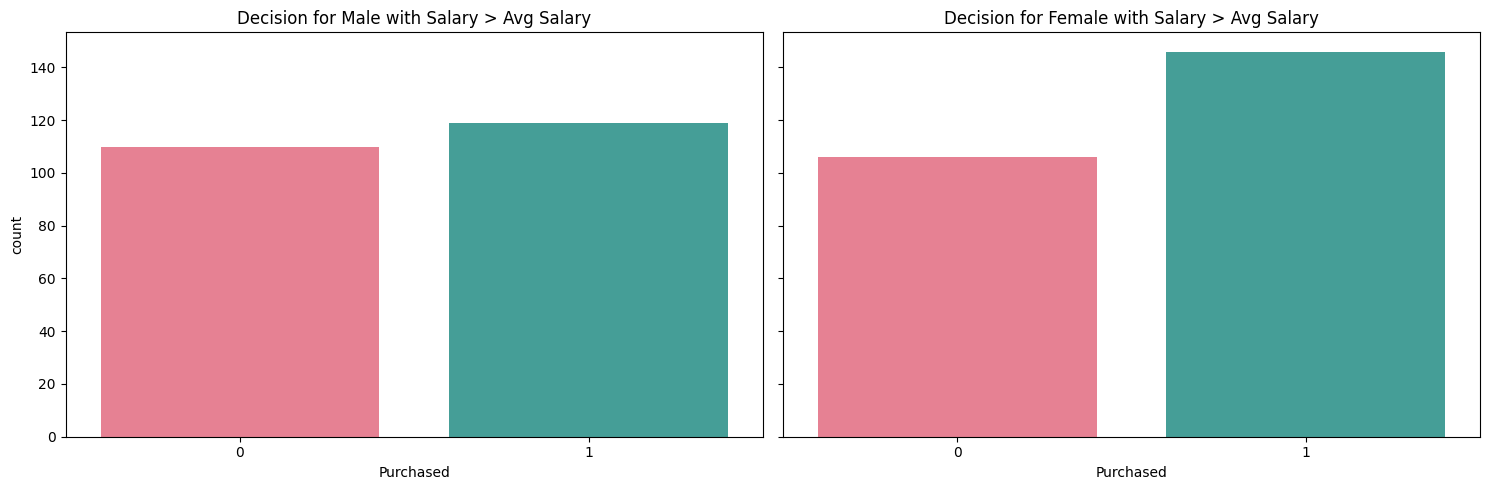

In [47]:
genders = df['Gender'].unique()  # Get unique gender values [ male and female ]
fig, axes = plt.subplots(1, len(genders), figsize=(15, 5), sharey=True)

for i, gender in enumerate(genders):
    gender_df = df[df['Gender'] == gender]
    sns.countplot(x='Purchased', data=gender_df[gender_df['Salary_Greater_Than_Avg']], palette='husl', ax=axes[i])
    axes[i].set_title(f'Decision for {gender} with Salary > Avg Salary')

plt.tight_layout()
plt.show()

In [48]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


correlation, p_value = pointbiserialr(df['Gender'], df['Purchased'])


print("Point-Biserial Correlation:", correlation)
print("P-Value:", p_value)

Point-Biserial Correlation: -0.04721142724778845
P-Value: 0.13571983035107482


CONVERTING GENDER INTO NUMERCIAL VALUE

In [49]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

In [50]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased,Age_Less_Than_Avg,Salary_Greater_Than_Avg
0,385,1,35,20000,0,True,False
1,681,1,40,43500,0,True,False
2,353,1,49,74000,0,False,True
3,895,1,40,107500,1,True,True
4,661,1,25,79000,0,True,True


<Axes: >

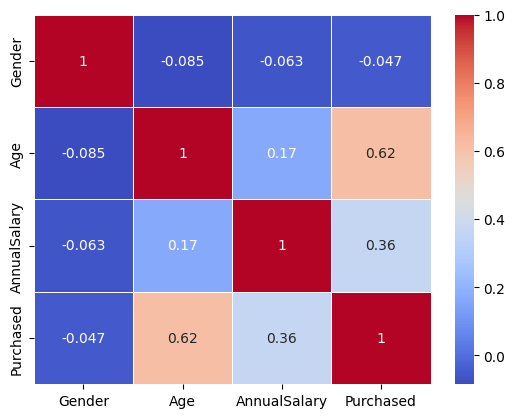

In [52]:
sns.heatmap(df.drop(columns=['User ID','Age_Less_Than_Avg','Salary_Greater_Than_Avg']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [53]:
from sklearn.model_selection import train_test_split

# since age and annual salary show relatively high correlation to purchased, we can club them to form an interatction
df['Age_Salary_Interact'] = df['Age'] * df['AnnualSalary']

# Define the features and target variable
X = df[['Gender', 'Age', 'AnnualSalary', 'Age_Salary_Interact']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
X.head()

,Gender,Age,AnnualSalary,Age_Salary_Interact
0,1,35,20000,700000
1,1,40,43500,1740000
2,1,49,74000,3626000
3,1,40,107500,4300000
4,1,25,79000,1975000


In [55]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Purchased, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_rf_new = RandomForestClassifier(n_estimators=100,random_state=0)

# Training model with train data
model_rf_new.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
# Pred on training set
y_train_pred = model_rf_new.predict(X_train)

# Pred on test set
y_test_pred = model_rf_new.predict(X_test)
y_pred = y_test_pred
#accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# accuracy scores
print("Train Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Train Set Accuracy: 0.9975
Test Set Accuracy: 0.94


In [58]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix
pd.crosstab(y_test,y_pred)

col_0,0,1
Purchased,,
0,115,6
1,6,73


In [60]:
# Display a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       121
           1       0.92      0.92      0.92        79

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



Save the model

In [61]:
import joblib

model_file_path = "D:\#College\CLG INTER\Car Purchase Prediction\model_rf_new.pkl"

# Save the model
joblib.dump(model_rf_new, model_file_path)

print(f"Random Forest model saved to {model_file_path}")

Random Forest model saved to D:\#College\CLG INTER\Car Purchase Prediction\model_rf_new.pkl
